In [1]:
import matplotlib.pyplot as plt

from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
from ipywidgets import *
from IPython.display import display, Math, Latex
import schemdraw
import schemdraw.elements as elm
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

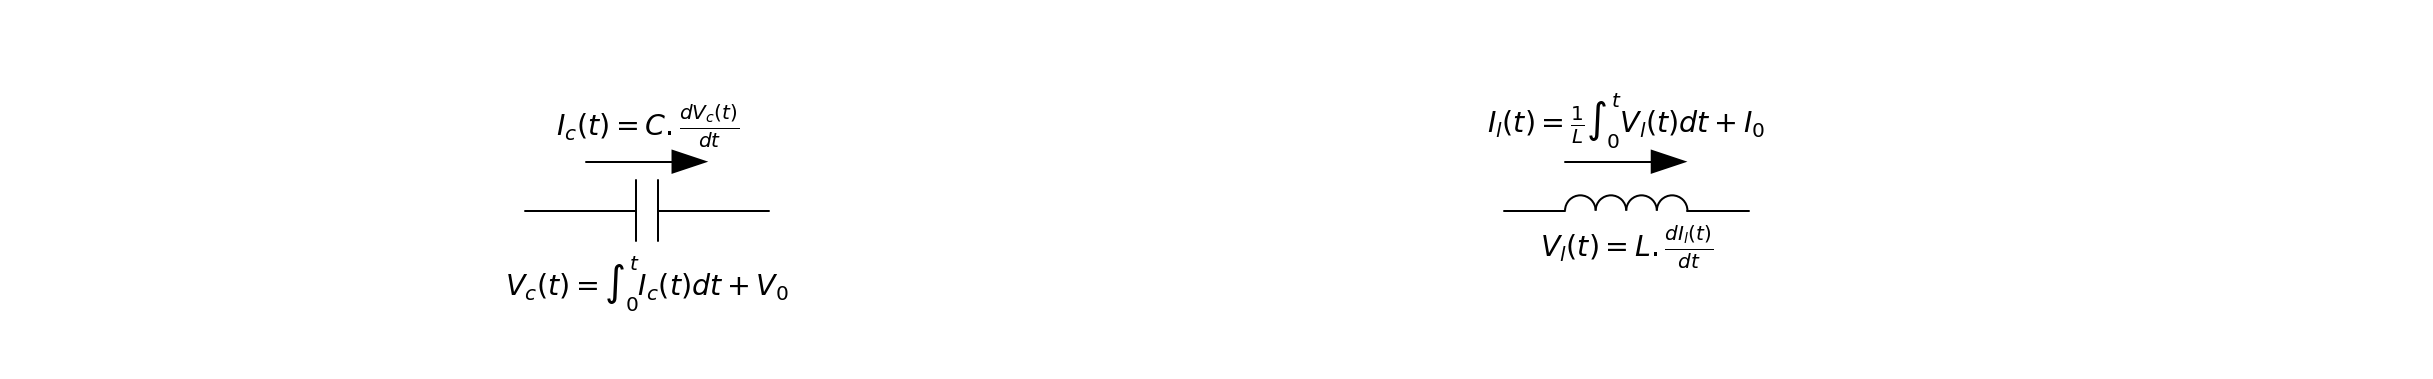

In [2]:
with schemdraw.Drawing() as d:
    d.config(inches_per_unit=2, unit=2)
    d += (c1 := elm.Capacitor().label([r'$V_c(t)=\int^t_0 I_c(t) dt + V_0$'], loc="bot", fontsize=30))
    d += elm.CurrentLabel(length=1).at(c1).label(r'$I_c(t)= C. \frac{dV_c(t)}{dt}$', loc='top', fontsize=30)
    d += (c1 := elm.Inductor().at((8, 0)).label([r'$V_l(t)=L.\frac{dI_l(t)}{dt}$'], loc="bot", fontsize=30))
    d += elm.CurrentLabel(length=1).at(c1).label(r'$I_l(t)= \frac{1}{L} \int_0^t V_l(t)dt + I_0$', loc='top', fontsize=30)


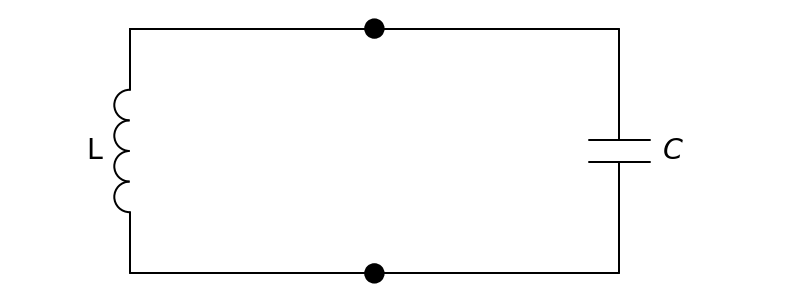

In [3]:
with schemdraw.Drawing() as d:
    d.config(inches_per_unit=2, unit=2)
    d += (s1 := elm.Line())
    d += (d1 := elm.Dot())
    d += (s2 := elm.Line())
    d += (c1 := elm.Capacitor().down().label(f'$C$', loc="bot", fontsize=30))
    d += (s3 := elm.Line().left())
    d += (d2 := elm.Dot())
    d += (s4 := elm.Line().left())
    d += (l1 := elm.Inductor().up().label(f'L', loc="top", fontsize=30))
    d += (s5 := elm.Line().right())
    # d += elm.LoopCurrent([d1, c1, d2, l1], direction='cw').label('$I(t)$', fontsize=30)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

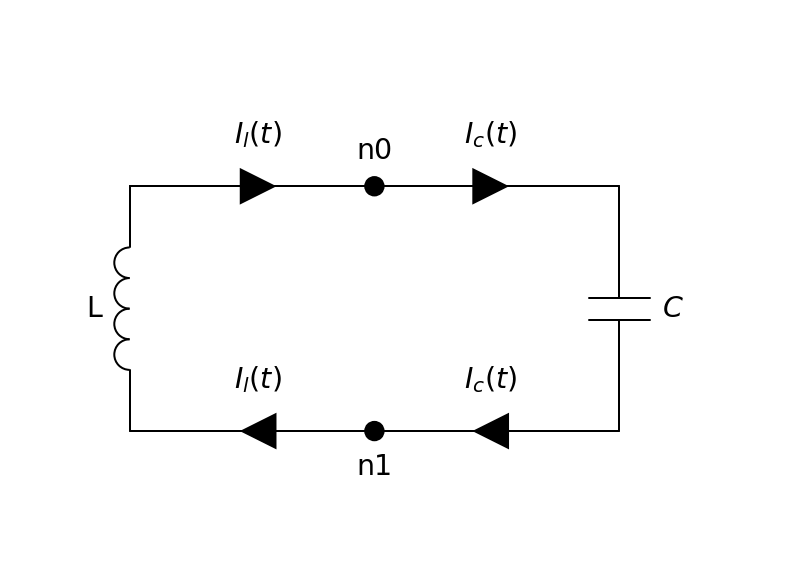

In [4]:
display(Math(r"\text{Using Kerckhoffs's current law}"))
display(Math(r"\text{Sum of all currents entering a node must be equal to 0}"))
with schemdraw.Drawing() as d:
    d.config(inches_per_unit=2, unit=2)
    d += (s1 := elm.Line())
    d += (d1 := elm.Dot().label('n0', fontsize=30))
    d += elm.CurrentLabelInline(direction='in', ofst=0.8).at(d1).label(r'$I_l(t)$', fontsize=30)
    d += elm.CurrentLabelInline(direction='in', ofst=-1.1).at(d1).label(r'$I_c(t)$', fontsize=30)
    d += (s2 := elm.Line())
    d += (c1 := elm.Capacitor().down().label(f'$C$', loc="bot", fontsize=30))
    d += (s3 := elm.Line().left())
    d += (d2 := elm.Dot().label('n1', fontsize=30, loc='bot'))
    d += elm.CurrentLabelInline(direction='out', ofst=0.8).at(d2).label(r'$I_l(t)$', fontsize=30)
    d += elm.CurrentLabelInline(direction='out', ofst=-1.1).at(d2).label(r'$I_c(t)$', fontsize=30)
    d += (s4 := elm.Line().left())
    d += (l1 := elm.Inductor().up().label(f'L', loc="top", fontsize=30))
    d += (s5 := elm.Line().right())
    # d += elm.LoopCurrent([d1, c1, d2, l1], direction='cw').label('$I(t)$', fontsize=30)

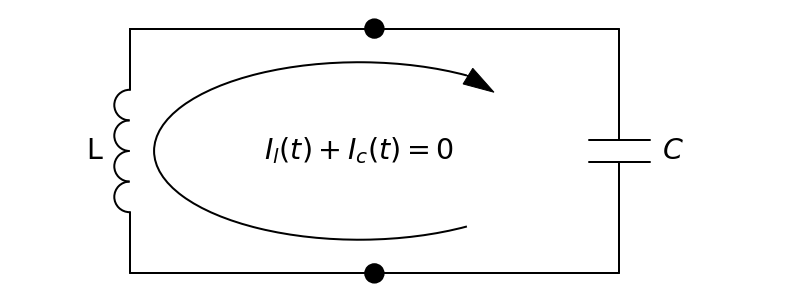

In [5]:
with schemdraw.Drawing() as d:
    d.config(inches_per_unit=2, unit=2)
    d += (s1 := elm.Line())
    d += (d1 := elm.Dot())
    d += (s2 := elm.Line())
    d += (c1 := elm.Capacitor().down().label(f'$C$', loc="bot", fontsize=30))
    d += (s3 := elm.Line().left())
    d += (d2 := elm.Dot())
    d += (s4 := elm.Line().left())
    d += (l1 := elm.Inductor().up().label(f'L', loc="top", fontsize=30))
    d += (s5 := elm.Line().right())
    d += elm.LoopCurrent([d1, c1, d2, l1], direction='cw').label(r'$I_l(t)+I_c(t)=0$', fontsize=30)

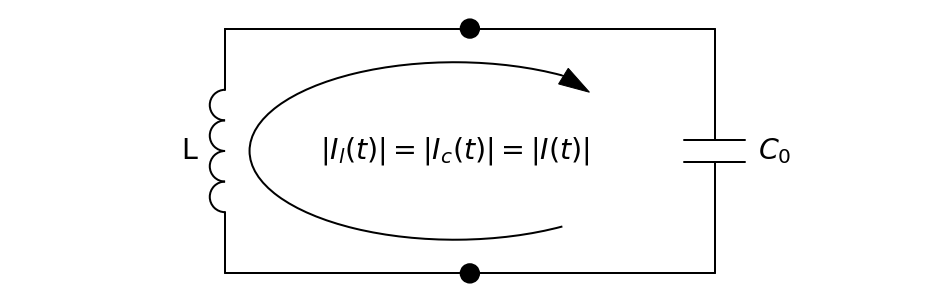

In [6]:
with schemdraw.Drawing() as d:
    d.config(inches_per_unit=2, unit=2)
    d += (s1 := elm.Line())
    d += (d1 := elm.Dot())
    d += (s2 := elm.Line())
    d += (c1 := elm.Capacitor().down().label(f'$C_{0}$', loc="bot", fontsize=30))
    d += (s3 := elm.Line().left())
    d += (d2 := elm.Dot())
    d += (s4 := elm.Line().left())
    d += (l1 := elm.Inductor().up().label(f'L', loc="top", fontsize=30))
    d += (s5 := elm.Line().right())
    d += elm.LoopCurrent([d1, c1, d2, l1], direction='cw').label(r'$|I_l(t)|=|I_c(t)|=|I(t)|$', fontsize=30)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

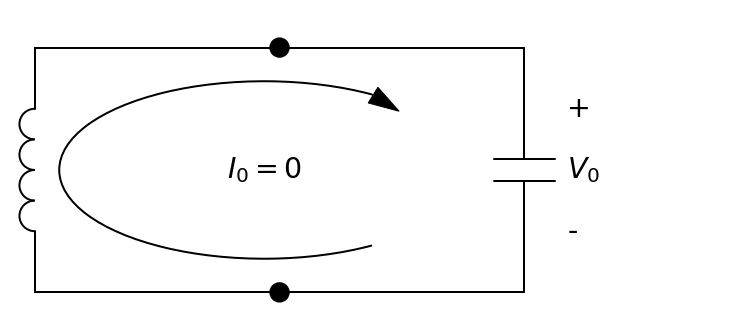

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
display(Math(r'\text{Assuming the following initial conditions:}'))
display(Math(r'$\text{Capacitor is initially charged at }V_0$'))
display(Math(r'$\text{No current is flowing through the circuit:   }I_0 = 0$'))
display(Math(r'$\text{Voltage accross both elements is equal:  } V_l(t) = V_c(t) = 0$'))

with schemdraw.Drawing() as d:
    d.config(inches_per_unit=2, unit=2)
    d += (s1 := elm.Line())
    d += (d1 := elm.Dot())
    d += (s2 := elm.Line())
    d += (c1 := elm.Capacitor().down().label(['+', r'$V_{0}$', '-'], loc="bot", fontsize=30))
    d += (s3 := elm.Line().left())
    d += (d2 := elm.Dot())
    d += (s4 := elm.Line().left())
    d += (l1 := elm.Inductor().up())
    d += (s5 := elm.Line().right())
    d += elm.LoopCurrent([d1, c1, d2, l1], direction='cw').label('$I_0=0$', fontsize=30)
# display(Math(r'$\mathscr{L}\{C.\frac{dV(t)}{dt}+\frac{1}{L} \int_0^tV(t)dt\}=0$'))
display(Math(r"\text{Kerckhoffs's current law}"))
display(Math(r'$I_c(t)+I_l(t)=0$'))
display(Math(r"\text{Substituting currents}"))
display(Math(r'$C.\frac{dV_c(t)}{dt}+\frac{1}{L} \int_0^tV_l(t)dt+I_0=0$'))
display(Math(r"\text{Solving integro-differential equation with laplace}"))
display(Math(r'$\mathscr{L}\{C.\frac{dV_c(t)}{dt}+\frac{1}{L} \int_0^tV_l(t)dt+I_0\}=\mathscr{L}\{0\}$'))
display(Math(r"\text{Applying initial conditions}"))
display(Math(r'$\mathscr{L}\{C.\frac{dV(t)}{dt}+\frac{1}{L} \int_0^tV(t)dt\}=\mathscr{L}\{0\}$'))


In [8]:
display(Math(r'\text{After some math...}'))
display(Math(r'$V(t)=V_0 \cos (\frac{1}{\sqrt{LC}}t)$'))
display(Math(r'$I(t)=-\sqrt{\frac{C}{L}}.\sin (\frac{1}{\sqrt{LC}}t)$'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

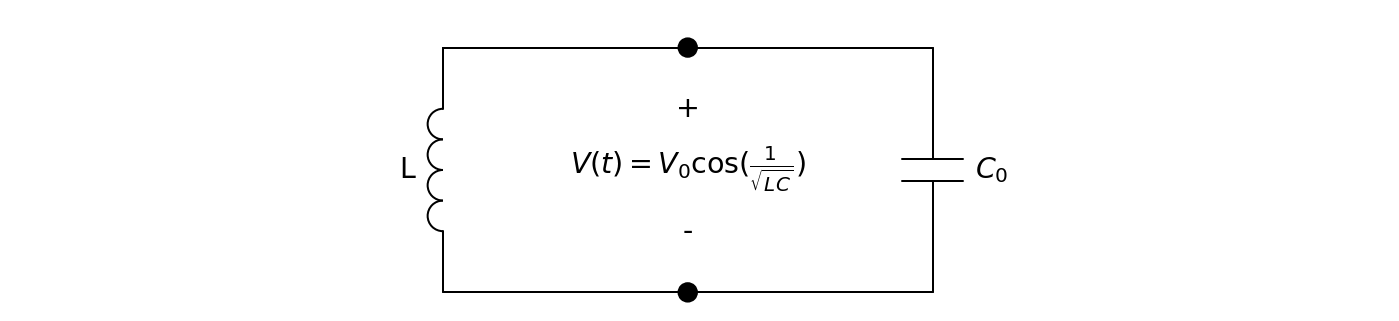

In [9]:
with schemdraw.Drawing() as d:
    d.config(inches_per_unit=2, unit=2)
    d += (s1 := elm.Line())
    d += (s2 := elm.Line().idot(open=False))
    d += (c1 := elm.Capacitor().down().label(f'$C_{0}$', loc="bot", fontsize=30))
    d += (s3 := elm.Line().left().dot(open=False))
    d += (s4 := elm.Line().left())
    d += (l1 := elm.Inductor().up().label(f'L', loc="top", fontsize=30))
    d += (s5 := elm.Line().right())
    d += elm.Gap().label(('+',r'$V(t)=V_0 \cos (\frac{1}{\sqrt{LC}})$','-'), fontsize=30).endpoints(s2.start, s3.end)
    
    # d += elm.LoopCurrent([d1, c1, d2, l1], direction='cw').label('$I(t)$', fontsize=30)

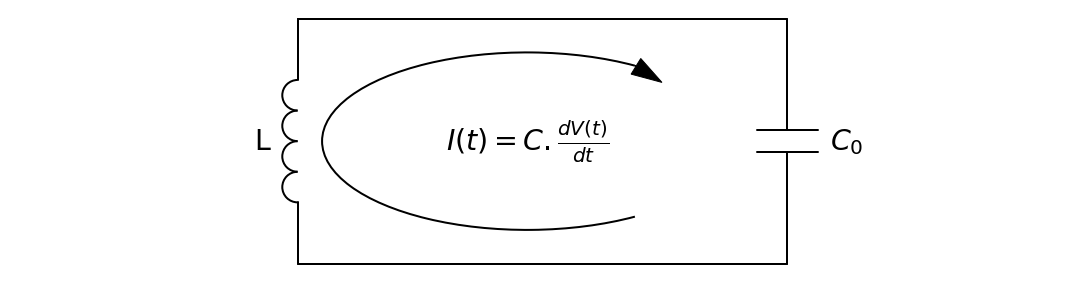

In [10]:
with schemdraw.Drawing() as d:
    d.config(inches_per_unit=2, unit=2)
    d += (s1 := elm.Line())
    d += (s2 := elm.Line())
    d += (c1 := elm.Capacitor().down().label(f'$C_{0}$', loc="bot", fontsize=30))
    d += (s3 := elm.Line().left())
    d += (s4 := elm.Line().left())
    d += (l1 := elm.Inductor().up().label(f'L', loc="top", fontsize=30))
    d += (s5 := elm.Line().right())
    d += elm.LoopCurrent([d1, c1, d2, l1], direction='cw').label(r'$I(t)=C.\frac{dV(t)}{dt}$', fontsize=30)

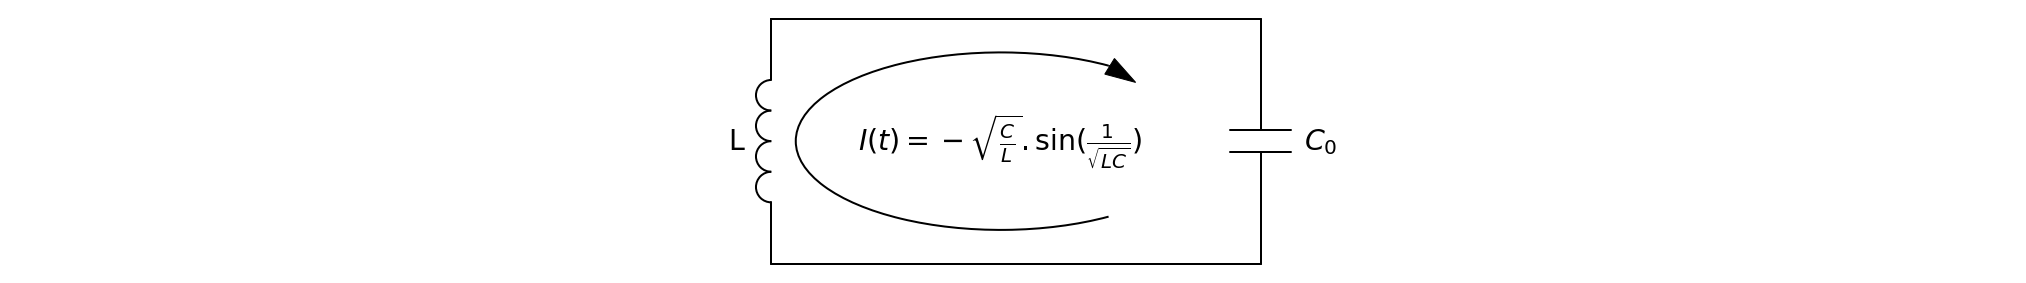

In [11]:
with schemdraw.Drawing() as d:
    d.config(inches_per_unit=2, unit=2)
    d += (s1 := elm.Line())
    d += (s2 := elm.Line())
    d += (c1 := elm.Capacitor().down().label(f'$C_{0}$', loc="bot", fontsize=30))
    d += (s3 := elm.Line().left())
    d += (s4 := elm.Line().left())
    d += (l1 := elm.Inductor().up().label(f'L', loc="top", fontsize=30))
    d += (s5 := elm.Line().right())
    d += elm.LoopCurrent([d1, c1, d2, l1], direction='cw').label(r'$I(t)=-\sqrt{\frac{C}{L}}.\sin (\frac{1}{\sqrt{LC}})$', fontsize=30)

In [12]:
def simulate(V0 = 1, L=0.05, C=0.05, show_voltage=True, show_current=True):
    circuit = Circuit('LCCircuit')
    circuit.L(1, 'node_01', circuit.gnd, C@u_mH) #hack?
    circuit.C(2,circuit.gnd, 'node_01', L@u_mF)
    Tf =3@u_ms
    T = 0.1@u_ms
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    simulator.initial_condition(node_01 = V0@u_V)
    analysis = simulator.transient(step_time=T/10, end_time=Tf)
    fig, ax1 = plt.subplots()
    a,b = -5e10,5e10
    if show_current:
        ax1.set_title(f'I(t)&V(t) @V0={V0}, C={C}, L={L}')
        ax1.set_xlabel('Time in ms')
        # ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        ax1.plot(analysis['node_01']) #bug with voltages vs currents
        ax1.set_ylabel('A')
        color = 'tab:blue'
        ax1.tick_params(axis='y', labelcolor=color)
        ax1.set_ylim(a,b)
    
    if show_voltage:
        ax2 = ax1.twinx()
        color = 'tab:red'
        ax2.plot(analysis.branches['l1'], 'r') #bug with voltages vs currents
        ax2.tick_params(axis='y', labelcolor=color)
        ax2.set_ylabel('V')
        ax2.set_ylim(a,b)

    
interact(simulate, V0=(1,5,0.01), C=(0.1, 0.5, 0.01), L=(0.1, 0.5, 0.01), show_voltage=True, show_current=True)
display(Math(r'$I(t)=-\sqrt{\frac{C}{L}}.\sin (\frac{1}{\sqrt{LC}}t)$'))
display(Math(r'$V(t)=V_0 \cos (\frac{1}{\sqrt{LC}}t)$'))

interactive(children=(FloatSlider(value=1.0, description='V0', max=5.0, min=1.0, step=0.01), FloatSlider(value…

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [13]:

display(Math(r'\text{Laplace transform}'))
display(Math(r'F(s)=\mathscr{L}\{f(t)\}=\int_0^\infty f(t).e^{-st}dt'))
display(Math(r'\text{Inverse Laplace transform}'))
display(Math(r'f(t)=\mathscr{L}^{-1}\{F(s)\}=\frac{1}{2\pi i}\lim_{T\to \infty}\int_{\gamma-iT}^{\gamma+iT} F(s).e^{st}ds'))

display(Math(r'\text{Where } s=\sigma + i \omega'))
display(Math(r'\text{Laplace is sort of like representing functions as a power series but instead of decomposing them into polynomials we decompose them into sinusoids and exponentials}'))
display(Math(r'\text{Laplace is a generalization of Fourier, if we only allow s to have imaginary values, i.e } \sigma = 0 \text{, Laplace becomes Fourier}'))
display(Math(r"\text{You usually use a } \href{https://tutorial.math.lamar.edu/classes/de/laplace_table.aspx}{table}\text{ of known transforms to compute Laplace and Inverse Laplace, you don't evaluate the integrals yourself}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [14]:
display(Math(r'\text{Starting with Laplace transform of time domain equation}'))
display(Math(r'\text{Since laplace transform is a linear operator}'))
display(Math(r'$\mathscr{L}\{\frac{dV(t)}{dt}+\frac{1}{L} \int_0^tV(t)dt\}=\mathscr{L}\{0\}$'))
display(Math(r'$C.\mathscr{L}\{\frac{dV(t)}{dt}\}+\frac{1}{L}\mathscr{L}\{ \int_0^tV(t)dt\}=0$'))
display(Math(r'\text{Applying transform to differentiation and integration using the transforms }\href{https://tutorial.math.lamar.edu/classes/de/laplace_table.aspx}{table}'))
display(Math(r'$C[sV(s)-V_0]+\frac{1}{L}.\frac{V(s)}{s}=0$'))
display(Math(r'\text{Rearranging..}'))
display(Math(r'$V(s)=\frac{C.V_0}{sC+\frac{1}{LS}}$'))
display(Math(r'\text{Massaging frequency domain function into a form easy to inverse with inverse laplace transform}'))
display(Math(r'$V(s)=V_0.\frac{s}{s^2+(\frac{1}{\sqrt{LC}})^2}$'))
display(Math(r'\text{Inversing}'))
display(Math(r'$V(t)=\mathscr{L}^{-1}\{V_0.\frac{s}{s^2+(\frac{1}{\sqrt{LC}})^2}\}$'))
display(Math(r'$V(t)=V_0.\mathscr{L}^{-1}\{\frac{s}{s^2+(\frac{1}{\sqrt{LC}})^2}\}$'))
display(Math(r'$V(t)=V_0.\mathscr{L}^{-1}\{\frac{s}{s^2+(a)^2}\}\text{  where }a=\frac{1}{\sqrt{LC}}$'))
display(Math(r'$V(t)=V_0 \cos (\frac{1}{\sqrt{LC}}t)$'))
display(Math(r'$I(t)=-\sqrt{\frac{C}{L}}.\sin (\frac{1}{\sqrt{LC}}t)$'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>